In [1]:
import pandas as pd
from IPython.core.display import HTML
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
data["data"]
#data.data

data_df=pd.DataFrame(data=data.data,columns=data.feature_names)
display(HTML(data_df.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
data.target
target=pd.DataFrame(data=data.target,columns=["species"])
display(HTML(target.to_html()))

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [5]:
iris=pd.concat([data_df,target],axis=1)
display(HTML(iris.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
iris.rename({
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)":"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)":"petal_width"   
},axis=1,inplace=True)
display(HTML(iris.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
#https://docs.hektorprofe.net/python/funcionalidades-avanzadas/funcion-map/#:~:text=La%20función%20map()%20se,que%20tengan%20la%20misma%20longitud.
#https://www.digitalocean.com/community/tutorials/how-to-use-the-python-map-function-es
iris["species"]=iris.species.map(lambda x:data.target_names[x])
#la funcion map con lamba hace una especie de reemplazo al bucle for,
#aplica una accion a cada miembro  de la lista que estamos modificando
#en este caso busca la posicion target_names[0],target_names[1],target_names[2]
#y reemplaza por su respectivo valor que seria el nombre de la especie

display(HTML(iris.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
iris.isna().sum()#verificamos si hay valores nulos NaN

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
PRIMER ANALISIS

Entre mas grande sea la desviacion estandar (mas lejos esta el punto del modelo) menos parecido
es la muestra del modelo
desviacion estandar alta es malo!!!!!!!!!

si al desviacion estandar es pequeña hay mas correlacion
recordemos que la correlacion es que tanto se parece la muestra al modelo


Analizamos desviacion estandar

petal_length tiene la mayor desviación estándar en comparación con otras características,
petal_width parece tener un rango de valores más estrecho
Sería mejor realizar una regularización después de comprobar el rendimiento 
del modelo debido a las diferencias de escala entre las características.

SyntaxError: invalid syntax (994546176.py, line 1)

In [11]:
iris.corr()#correlacion:analiza la relacion (que tanto se parecen) las caracteristicas

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [12]:
El coeficiente de correlación de la petal_length
y de petal_width es de 0,962865, que es extremadamente alto. 
Dado que las características altamente correlacionadas pueden inducir problemas (IA)
de multicolinealidad, se recomienda seleccionar una de las dos variables a utilizar.

SyntaxError: invalid syntax (600277259.py, line 1)

In [13]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [14]:
 iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [15]:
Seleccione entre "size" y "count" dependiendo del propósito del análisis,
ya que "size" cuenta el número de datos que incluyen valores NaN,
mientras que "count" cuenta el número de datos sin valores NaN.
En este caso, no hay diferencia entre "size" y "count" porque los datos de 
iris no tienen valores NaN.

SyntaxError: invalid syntax (1043439622.py, line 1)

# GRAFICAS REPRESENTATIVAS

# box plot -> diagrama de caja

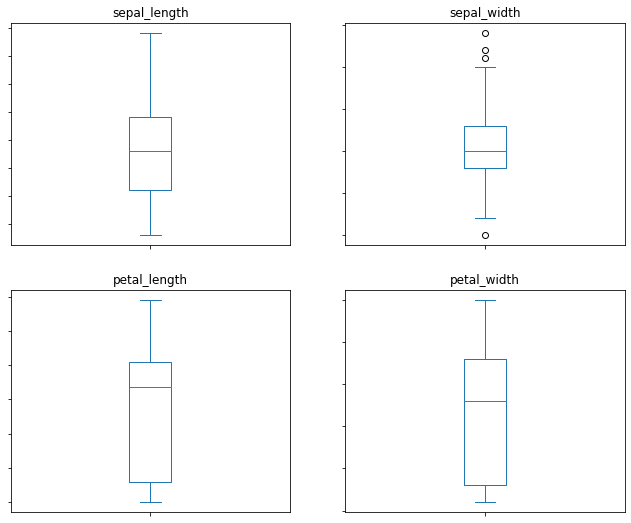

In [16]:
#https://byjus.com/maths/box-plot/

def boxplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind="box",subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()
    
boxplot_iris(iris.columns[:-1],iris)

In [17]:
Dado que las longitudes de las cajas de sepal_length y sepal_width son cortas,
se puede deducir que la tendencia de centralización de los datos es alta. 
El valor atípico se detecta en petal_width, y la longitud de caja larga de petal_length
y petal_width indica que los datos están más ampliamente distribuidos. 

SyntaxError: invalid syntax (2167139956.py, line 1)

# HISTOGRAMA

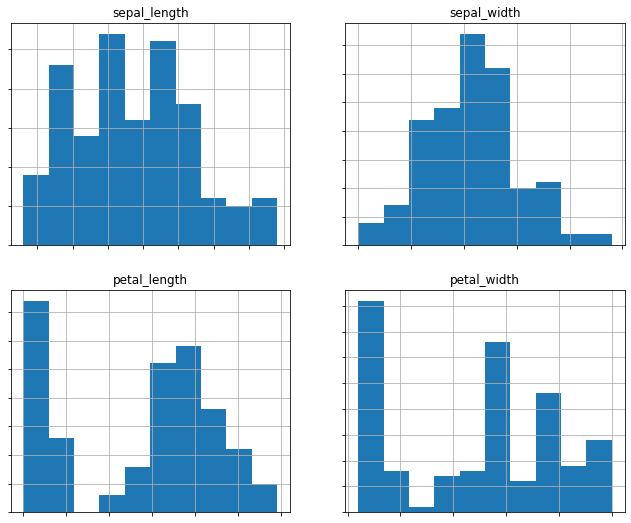

In [18]:
def hisplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
hisplot_iris(iris.columns[:-1],iris)

In [19]:
La frecuencia del intervalo de clase de la mediana es alta para sepal_width, 
y se vuelve más baja a medida que se aleja del centro. 
En el diagrama de caja, la longitud de la caja de sepal_width es corta porque se agregaron muchos datos en la mediana.
En el caso de la petal_width, la frecuencia del intervalo de clase de la mediana es alta, pero hay muchos datos en 
el intervalo de clase de la izquierda. 
En el gráfico de caja, la caja de petal_lengh es larga hasta el fondo porque hay muchos 
datos en valores inferiores. 


SyntaxError: invalid syntax (1488719980.py, line 1)

# Continuacion semana13

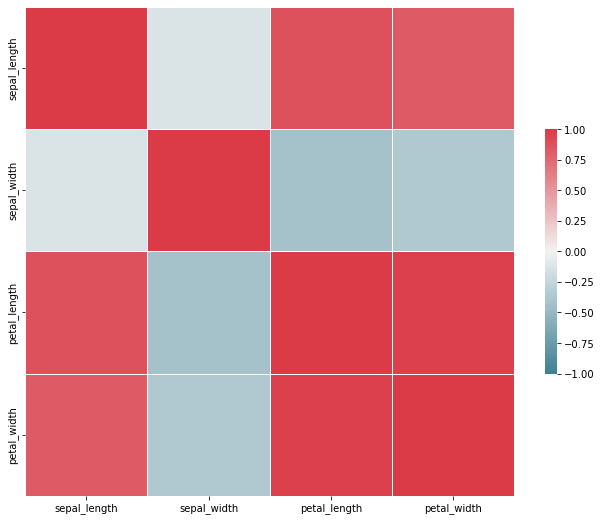

In [20]:
#visualizar la correlacion
import seaborn as sns


#mapa de calor (heatmap)

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr=iris.corr()
cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr,
            cmap=cmap,
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink":0.5}     
           )
plt.show()

[]

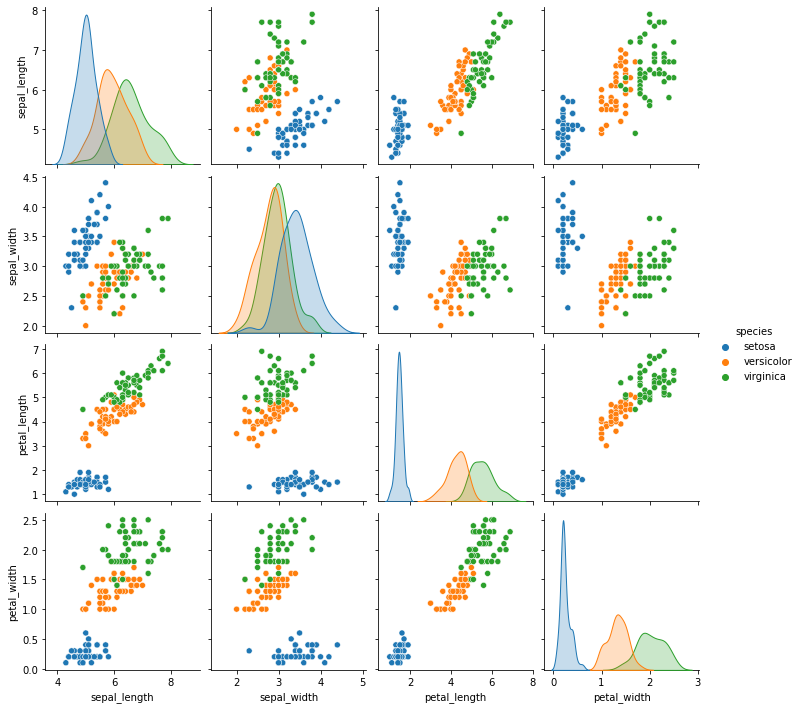

In [21]:
#Matriz de gráficos de dispersión
#Una matriz de gráficos de dispersión puede mostrar la relación entre múltiples variables.

sns.pairplot(iris,hue="species")
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

plt.plot()

In [22]:
setosa se agrega al desviarse claramente de otras clases. 
La clasificación es posible trazando una línea imaginaria, y setosa se clasificará como un modelo lineal.

En el caso de versicolor y virginica, parece difícil clasificarlas trazando una línea porque están mezcladas en el gráfico
completo con las características sepal_width y sepal_length. 
Sin embargo, aunque parezca un poco vago, se pueden clasificar en otros gráficos.


SyntaxError: invalid syntax (1395612616.py, line 1)

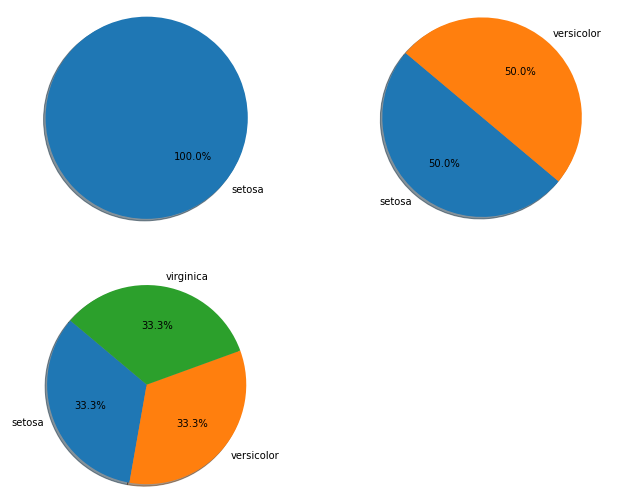

In [23]:
#grafico circular


def piechar_iris(feature_names,target,dataset):
    i=1
    plt.figure(figsize=(11,9))
    for colname in [target]:
        labels=[]
        sizes=[]
        df=dataset.groupby(colname).size()
        for key in df.keys():
            labels.append(key)
            sizes.append(df[key])
            plt.subplot(2,2,i)
            plt.axis("on")
            plt.tick_params(axis="both",
                            left=True,
                            top=False,
                            right=False,
                            bottom=True,
                            labelleft=True,
                            labeltop=True,
                            labelright=False,
                            labelbottom=False)
            plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=140)
            plt.axis("equal")
            i+=1
        plt.show()
            
piechar_iris(iris.columns[:-1],iris.species,iris)            
            
    
    
    
    
    
    
    
    
    

# Creamos el modelo de Machine learning

In [24]:
Antes de iniciar el aprendizaje automático, hay que dividir el conjunto de datos en datos de entrenamiento
y datos de prueba de rendimiento. El objetivo final del aprendizaje automático es crear un modelo generalizado
para que pueda predecir con precisión nuevos datos. Si se evalúa el rendimiento con los datos que se utilizaron 
en el aprendizaje, la posibilidad de acertar es alta, ya que el modelo ya está familiarizado con la característica 
de los datos dada. Para que la evaluación sea fiable, hay que separar el conjunto de datos de prueba de rendimiento 
del conjunto de datos de entrenamiento. Por tratarse de la separación de los datos, se denomina método hold out.

Divida el conjunto de datos de entrenamiento y el conjunto de datos de prueba de rendimiento con la función 
train_test_split de sklearn. Clasifique los datos de entrenamiento como "train" y los datos de prueba de rendimiento 
como "test". X es la característica del conjunto de datos, e y es el objetivo. Para el análisis de datos estructurados,
indique DataFrame con mayúsculas y Series con minúsculas. La opción test_size=0,33 separa el 33% de los datos totales
como conjunto de prueba. random_state=42 es una opción utilizada para inducir resultados reproducibles para el problema
de la práctica. Si no se designa random_state, el conjunto de datos para la conversión será diferente cada vez.


#NOTA: 3 pasos : 
#    1:instanciar
#        1.1:definir el modelo
#    2:fit ->ajustar
#    3:predecir    

#para instanciar, utilice el hiperparametro del modelo como argumento.
#el hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!)
#afecta MUCHO al rendimiento del modelo


SyntaxError: invalid syntax (3615488669.py, line 1)

In [25]:
from sklearn.model_selection import train_test_split

#instanciar el estimador y ajustar los parametros
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.33,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier #ver en la webpage : https://scikit-learn.org/stable/modules/tree.html#classification

#definimos el modelo
model=DecisionTreeClassifier(criterion="gini",
                             splitter="best",
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=42,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             #min_impurity_split=None,
                             class_weight=None
                            )


In [27]:
#Impureza de Gini o entropía
#La diferencia entre la impureza de Gini y la entropía es imprecisa en la vida real. Ambas crean un árbol similar. 
# El cálculo de la impureza de Gini es más rápido, por lo que se recomienda por defecto. Sin embargo, al crear un árbol diferente, mientras que la impureza de Gini tiende a aislar la clase más frecuente a un lado, 
# la entropía da lugar a un árbol más equilibrado. 
# Regularización: Limita el grado de libertad del árbol de decisión.
# Disminuir la profundidad máxima restringiría el modelo y reduciría el riesgo de sobreajuste. 
# min_samples_split: Cantidad mínima de muestras requeridas por el nodo para la división.  
# min_weight_fraction_leaf: Idéntico al min_samples_leaf, pero es la fracción con peso en toda la muestra. 
# max_leaf_nodes: Número máximo de nodos hoja.
# max_features: Número máximo de la característica que se utilizará para la división por cada nodo. 
# Aumentar el parámetro que empieza por min_ o bajar el que empieza por max_ aumentaría la restricción del modelo. 

In [28]:
#OJO!!!!! AQUI ESTA APRENDIENDO :D
model.fit(x_train,y_train) #le mando los datos de train para que entrene y aprenda
#fit ajusta los datos para crear un modelo (regresion) que pueda predecir los datos


DecisionTreeClassifier(random_state=42)

In [29]:
print("la eficiencia de la IA es: ",model.score(x_test,y_test))

#Evalúa el rendimiento utilizando el conjunto de datos de prueba de rendimiento.
#En el Scikit-learn, la puntuación se refiere a la precisión. Dado que el conjunto de datos del iris
#es un conjunto de datos bien estructurado para la práctica, generalmente muestra un alto rendimiento en cualquier modelo

la eficiencia de la IA es:  0.98


# Estrategia de generalización del modelo 

In [30]:
Dado que el aprendizaje automático se basa en el rendimiento de los modelos en función de los datos,
se requiere una cantidad suficiente de datos para obtener un buen rendimiento.
Una cantidad insuficiente de datos puede dar lugar a un sobreajuste, lo que significa que el modelo muestra una menor
capacidad de predicción con respecto a los datos no vistos porque se ajusta sólo a las características de los datos 
de entrenamiento. 

La siguiente es la estrategia de generalización para que el modelo proporcione un alto rendimiento
en relación con los datosno vistos. 

Conjunto de validación

El conjunto de datos de prueba de rendimiento dividido con Train_test_split es para la evaluación final del rendimiento
del modelo. 
Debido a que es necesario comprobar el rendimiento del modelo durante el aprendizaje del mismo,
se retiran algunos de los datos del conjunto de datos de entrenamiento y se utilizan como conjunto de validación.

Se puede encontrar una posibilidad de sobreajuste durante el aprendizaje utilizando el conjunto de validación,
y también se utiliza para encontrar los hiperparámetros. 

recorderis

#para instanciar, utilice el hiperparametro del modelo como argumento.
#el hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!)
#afecta MUCHO al rendimiento del modelo




SyntaxError: invalid syntax (570157557.py, line 1)

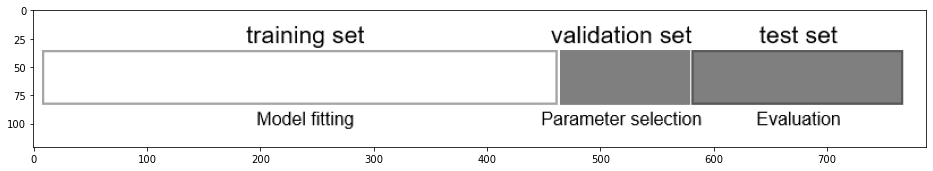

In [31]:
import cv2
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('1.png') ) 

# Validación cruzada

In [32]:
Esta es una estrategia para hacer muchos conjuntos de validación para que cada dato pueda ser incluido en el aprendizaje
una vez.

Dividir el conjunto de datos en un número aleatorio n=k (k-pliegues).

Utilice el primer pliegue como conjunto de validación y utilice los otros k-1 pliegues como conjunto de entrenamiento,
y mida el rendimiento.

Utilice el segundo pliegue como conjunto de prueba y los otros pliegues como conjunto de entrenamiento para el aprendizaje,
y luego mida el rendimiento. 

Repita el mismo proceso con todos los demás pliegues para poder incluir todos los datos en el entrenamiento.

Obtenga k resultados de evaluación del rendimiento y, a continuación, haga una media para predecir el rendimiento
del modelo. 

La siguiente figura es un ejemplo cuando k=5.

SyntaxError: invalid syntax (690328652.py, line 1)

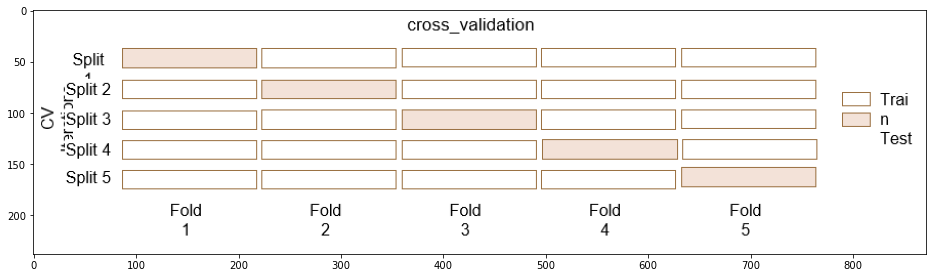

In [33]:
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('2.png') ) 

# Score o puntaje de la validacion cruzada

In [34]:
#La validación cruzada puede realizarse fácilmente utilizando la función cross_val_score de scikit-learn

from sklearn.model_selection import cross_val_score , KFold #fold ->pliegue

cv=KFold(n_splits=10,
         shuffle=True,
         random_state=42,
         )
results=cross_val_score(model, x_train, y_train, cv=cv)
fin_result=np.mean(results)

for i,j in enumerate(results): #enumerate asigna pares para el contador 
    print("score de la validacion cruzada(split) numero: {} = {} ".format(i,j))
    
print("El promedio o score final es:",fin_result)

score de la validacion cruzada(split) numero: 0 = 0.9 
score de la validacion cruzada(split) numero: 1 = 1.0 
score de la validacion cruzada(split) numero: 2 = 0.8 
score de la validacion cruzada(split) numero: 3 = 1.0 
score de la validacion cruzada(split) numero: 4 = 0.8 
score de la validacion cruzada(split) numero: 5 = 0.9 
score de la validacion cruzada(split) numero: 6 = 1.0 
score de la validacion cruzada(split) numero: 7 = 0.9 
score de la validacion cruzada(split) numero: 8 = 1.0 
score de la validacion cruzada(split) numero: 9 = 1.0 
El promedio o score final es: 0.93


# método estratificado

In [35]:
#https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869

La división aleatoria del conjunto de entrenamiento y del conjunto de validación daría lugar a  una clase objetivo 
inconstante cuando se retiene. Si es así, la distribución de los datos difiere en el conjunto de entrenamiento
y en el conjunto de validación, lo que afecta al aprendizaje. 

Para el aprendizaje automático, existe una premisa en la que la distribución de los datos de entrenamiento
y la distribución de los datos de la vida real son iguales. 
Si no se cumple esta premisa, el rendimiento del modelo de aprendizaje disminuye. 
Por lo tanto, para evitar este problema, se utiliza el método estratificado para distribuir uniformemente 
la proporción de clases objetivo.

La validación cruzada es posible enviando la instancia de StratifiedKFold a la opción cv de cross_val_score.

La siguiente figura proporciona una comprensión intuitiva de cómo el método estratificado clasifica los datos.

SyntaxError: invalid syntax (2335240147.py, line 3)

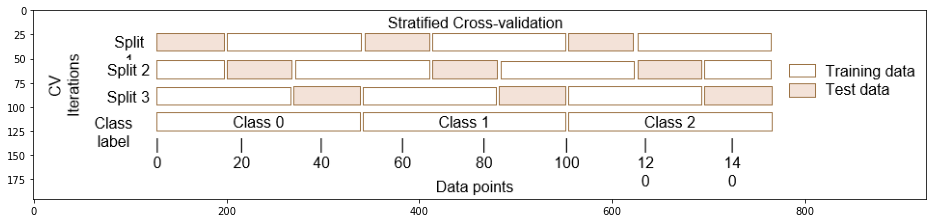

In [36]:
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('3.png') ) 

In [37]:
from sklearn.model_selection import StratifiedKFold #fold ->pliegue

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu_stratified = []

# Input_x_Features.
x = data.data                        
 
# Input_ y_Target_Variable.
y = data.target  

# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
  
# Create  classifier object.
lr = model
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index,"\n \n ", "TEST:", test_index,"\n _______________________")
    
    
print("_______________________eficiencia_____________________________\n")    
    
for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  12  13  15  16  17  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  34  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57  58  60
  61  62  63  64  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  88  89  90  91  92  93  94  95  96  98  99
 101 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 125 126 127 128 129 131 132 133 134 135 136 137 138 139
 140 141 142 143 145 146 147 148 149] 
 
  TEST: [ 11  14  25  33  35  52  59  65  87  97 100 107 124 130 144] 
 _______________________
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  16  17  18  19
  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  79  80  81  82  83  84  86  87  88  89  

In [38]:
Si la cantidad de datos es suficiente, se mantiene una distribución de datos idéntica incluso cuando el conjunto 
de entrenamiento y el conjunto de validación se dividen aleatoriamente. El método de validación cruzada es necesario 
cuando los datos son insuficientes. Para determinar si hay suficiente cantidad de datos, dibuje una curva de aprendizaje. 
La curva de aprendizaje muestra cómo cambia el rendimiento al aumentar ligeramente la cantidad de datos de entrenamiento, 
estableciendo el eje x como número de datos de entrenamiento y el eje y como puntuación de rendimiento. 
La puntuación de la prueba se calcula mediante una validación cruzada interna
La curva de aprendizaje puede ser dibujada usando la librería scikitplot que soporta scikit-learn. 

Instalaremos entonces la biblioteca por separado de scikit-learn para utilizarla.
La biblioteca scikitplot no se proporciona en anaconda por defecto, por lo que es necesario instalarla 


SyntaxError: invalid syntax (4075379934.py, line 1)

In [39]:
import sys
!{sys.executable} -m pip install scikit-plot

# Curva de aprendizaje

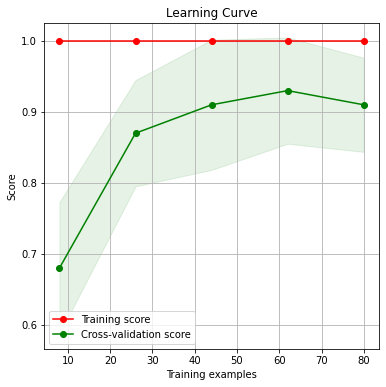

In [40]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(model,x_train,y_train,figsize=(6,6))
plt.show()


In [41]:
La línea verde es el resultado de la validación cruzada. Cuando la línea verde sube hacia la derecha pero luego empieza 
a bajar, es cuando se produce el sobreajuste. La línea roja son los datos utilizados para el entrenamiento que se validan.
La línea roja puede caer momentáneamente si hay demasiados datos. Este fenómeno es sólo temporal y el gráfico converge
a largo plazo.

La curva de entrenamiento está desconectada ya que la línea verde aumenta, por lo que se desconoce si hay más datos.
En este punto, es imposible saber si hay suficientes datos o no. La curva de entrenamiento se dibuja de forma diferente
según el algoritmo, incluso cuando se utilizan los mismos datos. Por lo tanto, lo que se sabe de esta curva de
entrenamiento es que el rendimiento del modelo de árbol de decisión actual sería mejor si hay más datos.



SyntaxError: invalid syntax (1171310400.py, line 1)

# Empecemos a optimizar

In [42]:
#Hiperparámetro

recordando: Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de entrenamiento de un modelo.


En el aprendizaje automático, la máquina aprende de los datos y encuentra los parámetros por sí misma.
Los hiperparámetros se refieren a los parámetros que necesitan ser designados directamente por un humano (SUPERVISED)
ya que no pueden ser encontrados por la máquina.
En el scikit-learn, es posible establecer hiperparámetros para instanciar un algoritmo.

# Búsqueda de hiperparámetros mediante GridSearchCV
En general, los hiperparámetros se encuentran con la experiencia de un analista. 
Scikit-learn proporciona la función GridSearchCV que encuentra los hiperparámetros, esta es una función que enumera todo
el número de casos con respecto a la combinación de hiperparámetros en una cuadrícula y aprende y realiza la medición
del rendimiento a cada combinación.

Puede parecer que se trabaja sin ningún plan, pero el trabajo lo realiza automáticamente la máquina,
ya que el rango de hiperparámetros es designado por el analista.
Aunque lleva algo de tiempo, facilita la búsqueda de hiperparámetros. 

De forma similar a los algoritmos, instancie también el GridSearchCV.
Al instanciar, envíe el modelo de algoritmo instanciado como argumento a la opción de estimador.
Para param_grid, envíe el diccionario que contiene los hiperparámetros para las pruebas como argumento.



SyntaxError: invalid syntax (1840937445.py, line 3)

In [70]:
estimator=DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameters= {"max_depth":[4,6,8,10,12],
             "criterion":["gini","entropy"],
             "splitter":["best","random"],
             "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3],
             "random_state":[7,23,42,78,142],
             "min_impurity_decrease":[0.0,0.05,0.1,0.2]
            }

model2=GridSearchCV(estimator=estimator,
                   param_grid=parameters,
                   cv=KFold(10),
                   verbose=1,
                   n_jobs=-1,
                   refit=True
                   )
model2.fit(x_train,y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
El número total posible de casos que se pueden realizar con los parámetros del problema de práctica es de 1600.
Como k=10 en la validación cruzada K-fold, se realizaron 10 validaciones cruzadas para cada caso, 
de modo que se hizo un total de 16.000 entrenamientos. 

La siguiente tabla muestra las combinaciones de hiperparámetros en el problema de práctica. 

SyntaxError: invalid syntax (1146893501.py, line 1)

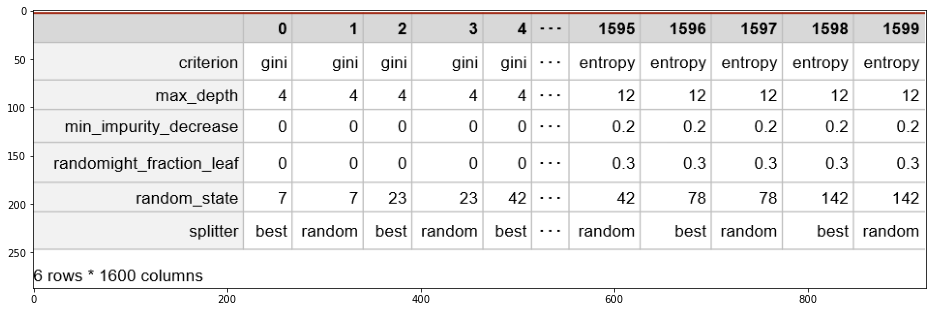

In [69]:
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('4.png') ) 

In [45]:
Los parámetros óptimos y el rendimiento optimizado encontrados con GridSearCV se registran en los atributos 
best_params_ y best_score_. 
Si la opción refit se establece como True, 
entrena el modelo con los hiperparámetros óptimos y los registra en el atributo best_estimator_

SyntaxError: invalid syntax (2363477694.py, line 1)

In [71]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random')

In [72]:
model2.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'random'}

In [73]:
print("la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 = ",model2.best_score_)


la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 =  0.9700000000000001


In [74]:
from sklearn.metrics import accuracy_score
pred=model2.predict(x_test)
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [50]:
accuracy_score(y_test,pred)

0.98

In [ ]:
#Limitaciones de la precisión
Hasta ahora, la precisión era el único criterio para validar el modelo, pero existe una limitación. 
Se necesita algo más que la precisión para evaluar el modelo correctamente. 
Si hay un modelo que sólo predice "setosa" incluso cuando se introducen varios tipos de datos, 
el rendimiento del modelo sería dudoso. Sin embargo, supongamos que hay 48 setosas, 1 versicolor y 1 virginica 
en el conjunto de prueba. Al hacer una evaluación utilizando este conjunto de prueba, un problema es que 
tendría un 96% de precisión. Sin embargo, no es porque el rendimiento del modelo sea grande. Sería necesario 
comprobar también otros criterios de evaluación para evaluar con precisión el rendimiento del modelo. 


# matriz de confusion

In [ ]:
Utilice la matriz de confusión para analizar los resultados predichos correctos y erróneos. 
La matriz de confusión puede validar el rendimiento de diferentes maneras para ver lo bien que acertaron 
los objetivos predichos y los reales. 

Las puntuaciones de evaluación incluyen la precisión, el recuerdo, la puntuación f1 y otras, 
se pueden realizar en función de los cuatro conceptos (TP, FP, TN, FN). indicados en la siguiente grafica 


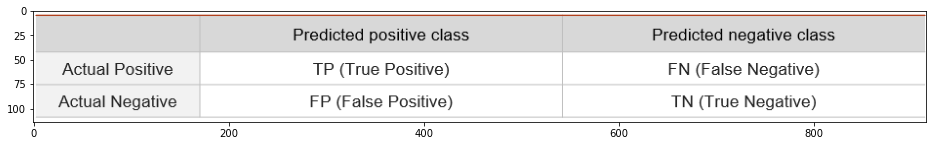

In [51]:
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('5.png') ) 

## Clasificación multietiqueta

In [ ]:
Dado que los datos del iris son un problema de clasificación multietiqueta, no pueden expresarse en cuatro
conceptos diferentes solamente, como se ha indicado anteriormente. 
Por lo tanto, cree tres índices para cada setosa, versicolor y virginica considerando cada uno de ellos 
como un problema de clasificación binaria. Tomemos como ejemplo la setosa.



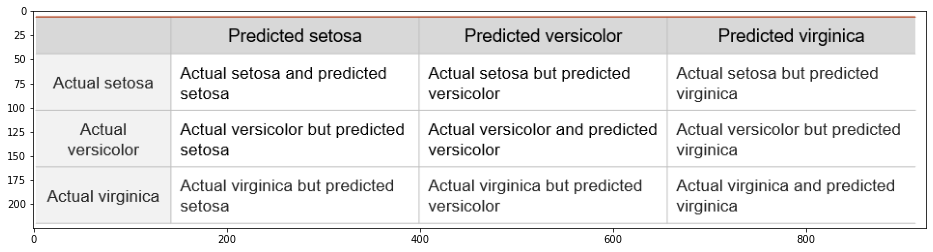

In [52]:
fig = plt.figure(figsize=(16, 13)) 
plt.imshow(cv2.imread('6.png') ) 

In [53]:
# Con scikit-learn, es posible calcular fácilmente la matriz de confusión utilizando la función confusion_matrix.
# Envía los argumentos a la clase real y luego a la clase predicha.

from sklearn.metrics import confusion_matrix

#pred=model2.predict(x_test) # ya lo teniamos

confusion_matrix(y_test,pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

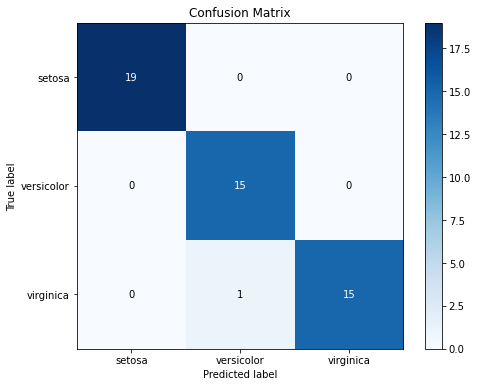

In [54]:
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

#usamos scikit-plot para visualizar la matriz de confusión en un mapa de calor.
# El scikit-learn no tenía etiquetas para el eje x y el eje y, pero scikit-plot tiene etiquetas para 
# el eje para facilitar la interpretación de los resultados.

## Precision

In [55]:
#La precisión es la proporción de la clase predicha correctamente

#precision= TP/(TP+FP)

from sklearn.metrics import precision_score

precisions=precision_score(y_test,pred,average=None) 

for target,score in zip(data.target_names,precisions):
    print("{} presicion : {}".format(target,score))

setosa presicion : 1.0
versicolor presicion : 0.9375
virginica presicion : 1.0


## Recall

In [56]:
#También llamado sensibilidad o recuperacion, el recall es la proporción de predicciones correctas entre la clase objetivo real.

#recall=TP/(TP+FN)

from sklearn.metrics import recall_score

recalls=recall_score(y_test,model2.predict(x_test),average=None)

for target,score in zip(data.target_names,recalls):
    print("{} sensibilidad (recall) : {}".format(target,score))

setosa sensibilidad (recall) : 1.0
versicolor sensibilidad (recall) : 1.0
virginica sensibilidad (recall) : 0.9375


## f-score

In [ ]:
La precisión y la recuperación tienen una relación de compromiso.
La puntuación f es la media armónica ponderada de la precisión y la recuperación. 
Si la puntuación f es inferior o igual a 1, se da más peso a la precisión, y si es superior a 1, 
se da más peso a la recuperación. La puntuación f se utiliza para comprender con precisión el rendimiento del modelo 
cuando la clase de datos está desequilibrada.


In [58]:
from sklearn.metrics import f1_score

    
f1s=f1_score(y_test,pred,average=None)

for target,score in zip(data.target_names,f1s):
    print("{} f1_score : {}".format(target,score))

setosa f1_score : 1.0
versicolor f1_score : 0.967741935483871
virginica f1_score : 0.967741935483871


# Reporte de clasificacion

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
El soporte es el número de clases objetivo reales. 
La media de las puntuaciones de evaluación de cada clase se utiliza como puntuación de rendimiento global del modelo.
La media macro se refiere a una media simple, mientras que la media ponderada es una media ponderada del número 
de muestras de cada clase.


## ROC curve

In [ ]:
La curva ROC (Receiver Operating Characteristic) visualiza los cambios en la tasa de recuperación y de falsos positivos
en función de los cambios en el valor de determinación de la clase. 
A medida que el valor de determinación de la clase es menor, aumenta el número de positivos de predicción.

Por ejemplo, si la probabilidad de setosa es de 0,6, cuando el valor de referencia es de 0,55, predice positivo,
pero si el valor de referencia aumenta a 0,65, la predicción cambia a negativo. 

In [61]:
pred_proba=model2.predict_proba(x_test)
pred_proba

array([[0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.0625    , 0.9375    ],
       [1.

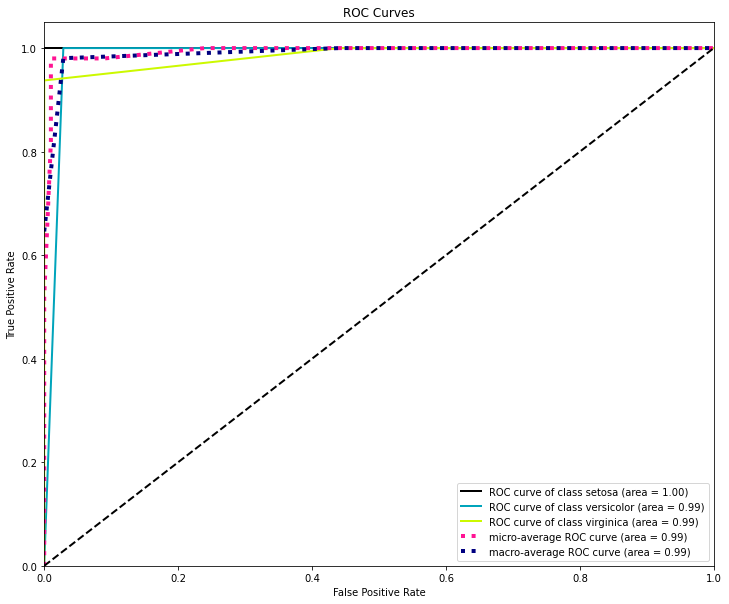

In [64]:
skplt.metrics.plot_roc(y_test,pred_proba,figsize=(12,10))
plt.show()

In [ ]:
El modelo tiene un mejor rendimiento a medida que la curva ROC se desvía hacia arriba de la línea diagonal.
Para expresar el gráfico con números, calcule el área inferior de la curva ROC, que estará entre 0 y 1.
Esto se denomina AUC (Area Under ROC Curve), y cuando el AUC es 1, el rendimiento del modelo es máximo.
Si el AUC es superior a 0,5, tendrá un mejor rendimiento que un modelo de clasificación creado al azar.
Por otro lado, si el AUC es inferior a 0,5, es probable que el modelo tenga un problema.

El AUC se convierte en 0 cuando la predicción de verdadero y falso es opuesta. 

In [ ]:
Si el rendimiento del modelo no cumple con el objetivo del resultado de la evaluación del modelo, 
vuelva al paso anterior para mantener el modelo. Reorganice los hiperparámetros o cambie el algoritmo. 
O bien, vuelva al paso de preprocesamiento para escalar las características o reducir el número de características 
sin sentido. Si los datos son insuficientes o la calidad de los datos es un problema, vuelva a la etapa de recogida
de datos.


Si el rendimiento del modelo alcanza el objetivo, utilice todos los datos para aprender el modelo final. 
Como una mayor cantidad de datos de aprendizaje da como resultado un mejor rendimiento del modelo, utilice 
todos los datos que se dividieron en conjunto de entrenamiento, conjunto de validación y conjunto de prueba.
Si el rendimiento disminuye con más datos de entrenamiento, entonces el modelo se está sobreajustando a los 
datos de entrenamiento, por lo que es necesario mejorar el modelo con la regresión. 


# Modelo final :D

In [ ]:
Se tarda días en aprender si hay muchos datos. 
Es extremadamente ineficiente entrenar el modelo cada vez para la predicción, 
así que la mejor manera es guardar el modelo para reutilizarlo. Usa 'pickle' para guardar el modelo. 

In [67]:
model.fit(iris.iloc[:,:-1],iris.iloc[:,-1])

DecisionTreeClassifier(random_state=42)

In [75]:
import pickle

with open("final_model.pickle","wb") as fp:
    pickle.dump(model2,fp)
    

In [80]:
f=open("final_model.pickle","rb")
model3=pickle.load(f)


In [88]:
predicted_species=model3.predict((iris.iloc[:,:-2]))

In [89]:
iris["predicted_species"]=predicted_species
iris.to_csv("final_result.csv",index=False)